In [1]:
import numpy as np
import h5py
from scipy import signal
import scipy.io
from scipy.fftpack import fft

import matplotlib
import matplotlib.pyplot as plt

from filt_matlab_data import filt_matlab_data

In [2]:
matplotlib.rcParams["figure.figsize"] = [15, 8]

----------

## test filt_matlab_data function

In [3]:
matfile = scipy.io.loadmat('data/10_channels_10_minutes.mat')

In [4]:
print(matfile.keys())

dict_keys(['__header__', '__version__', '__globals__', 'LFP'])


In [5]:
multich_data = matfile.get("LFP")[0]

In [6]:
ch_select = "".join([str(int((arr != 0).any())) for arr in multich_data])

In [7]:
ch_select

'111101111000000000'

In [8]:
filtered = filt_matlab_data("data/R-HPC-ch14.mat", "data/1ch_filtered", 1, 32000, 300, 3000)

In [9]:
filtered

array([   6.93369313,  -93.16030102, -173.00337276, ...,   51.42570264,
         21.09863723,  -20.84474541])

In [10]:
multich_filtered = filt_matlab_data(
    "data/10_channels_10_minutes", "data/10ch_filtered", 18, 32000, 300, 3000, ch_select
)

In [11]:
multich_filtered

array([array([11.98567184, 27.4606782 , 43.53687992, ...,  9.2555699 ,
       12.56574797, 16.08922458]),
       array([  -8.48874092,   10.76040641,   24.70113723, ..., -191.9556028 ,
       -108.15180252,  -11.0282067 ]),
       array([ 5.34512024,  8.72065928,  8.84423583, ..., -7.28722292,
       -0.9056097 ,  5.95941611]),
       array([-1.2368191 , 13.40023284, 26.0032538 , ..., 44.54656519,
       20.92665205, -6.4528767 ]),
       array([11.58805399, 23.16991562, 35.77825388, ...,  8.25378111,
       11.3390195 , 14.62175322]),
       array([  -7.53139583,    4.22621707,   12.26464363, ..., -168.52748663,
        -94.6000222 ,   -9.01999052]),
       array([ 4.52911555, 13.66707752, 19.16566463, ..., -0.22116635,
        3.18197841,  6.35708537]),
       array([-1.37703637,  9.53441014, 18.97025729, ..., 54.62795652,
       27.84839985, -3.80481993])], dtype=object)

---------------

## Filtering procedure and visualizations for one channel

In [ ]:
data = scipy.io.loadmat('data/R-HPC-ch14.mat').get("M")[0]

### set parameters

sampling frequency: 32 kHz

duration: ~26 min

channels: 1

passband: 300-3000 Hz

In [12]:
sfreq = 32000
N = data.shape[0]
dur = N / sfreq
freq_domain = np.linspace(0, sfreq, N)
passband = (300, 3000)

----------------

### Fourier transform

In [13]:
ft = fft(data)

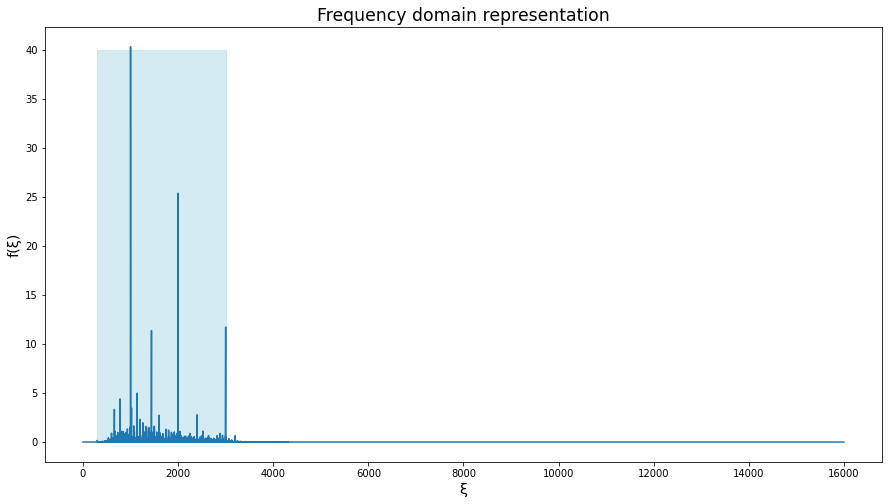

In [14]:
plt.plot(freq_domain[: N // 2], 2.0 / N * np.abs(ft[: N // 2]))
plt.title("Frequency domain representation", fontsize="xx-large")
plt.xlabel("ξ", fontsize="x-large")
plt.ylabel("f(ξ)", fontsize="x-large")
plt.fill_betweenx(
    np.arange(0, (2.0 / N * np.abs(ft[: N // 2])).max()),
    *passband,
    color="lightblue",
    alpha=0.5
)

-------------

### Design bandpass filter

In [11]:
sos = signal.butter(10, passband, btype="bandpass", fs=sfreq, output="sos",)
w, h = signal.sosfreqz(sos)

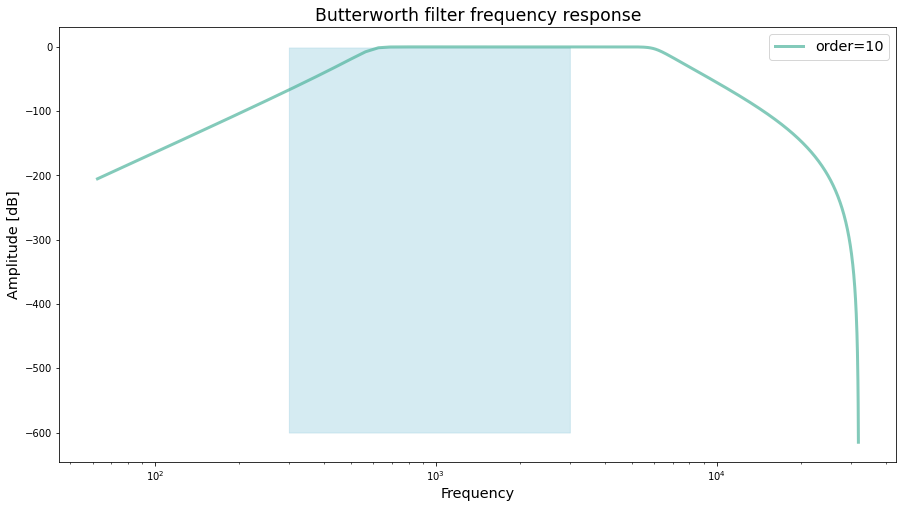

In [14]:
plt.plot(
    w[1:] / np.pi * sfreq,
    20 * np.log10(abs(h[1:])),
    label="order=10",
    linewidth=3,
    alpha=0.7,
    c="#4fb49d",
)

plt.fill_betweenx(np.arange(-600, 0), *passband, color="lightblue", alpha=0.5)
plt.xscale("log")
plt.title("Butterworth filter frequency response", fontsize="xx-large")
plt.xlabel("Frequency", fontsize="x-large")
plt.ylabel("Amplitude [dB]", fontsize="x-large")
plt.legend(fontsize="x-large")

---------

### Apply filter

In [12]:
filtered = signal.sosfiltfilt(sos, data)

Text(0.5, 1.0, 'First second of filtered signal')

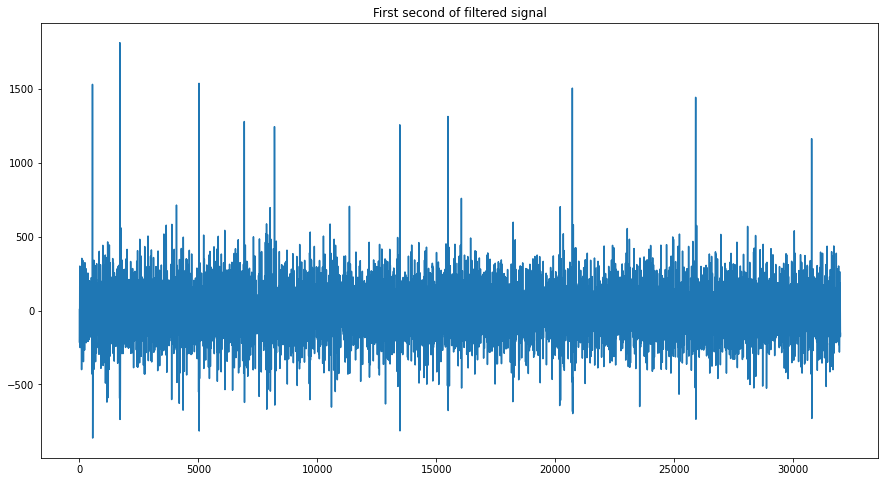

In [22]:
plt.plot(filtered[:32000])
plt.title("First second of filtered signal")

In [17]:
ft_filtered = fft(filtered)

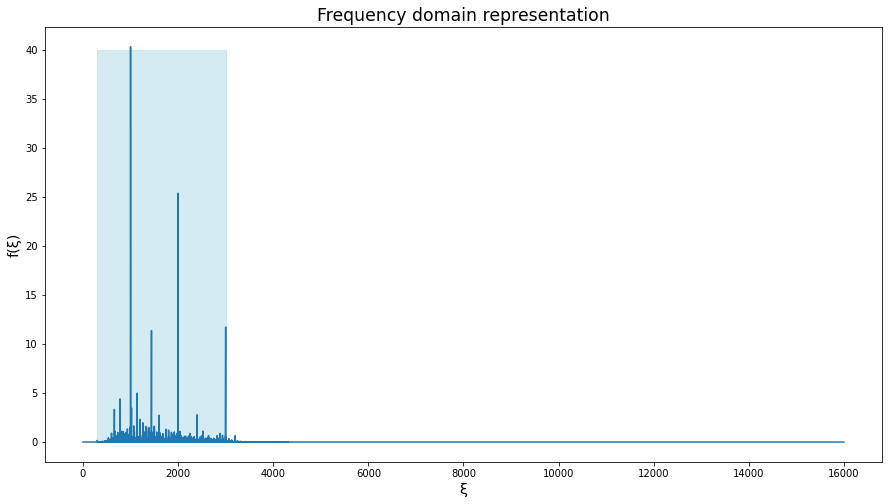

In [19]:
plt.plot(freq_domain[: N // 2], 2.0 / N * np.abs(ft_filtered[: N // 2]))
plt.title("Frequency domain representation", fontsize="xx-large")
plt.xlabel("ξ", fontsize="x-large")
plt.ylabel("f(ξ)", fontsize="x-large")
plt.fill_betweenx(
    np.arange(0, (2.0 / N * np.abs(ft_filtered[: N // 2])).max()),
    *passband,
    color="lightblue",
    alpha=0.5
)

In [17]:
scipy.io.savemat('new_filtered.mat', {'M': filtered})